## Set Up

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn import preprocessing
from copy import deepcopy
from scipy.stats import pearsonr
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('~/Work-Notebooks/120-videos-analysis/120vids.csv').drop(['Unnamed: 0','vid_id'], axis=1)
df

,emoticonusage_num_emo,emoticonusage_chunk_unique_users,emoticonusage_perc_emoji_of_stream,emoticonusage_emoji_user_ratio,uniqueusersengagement_hour_unique_users,uniqueusersengagement_chunk_unique_users,uniqueusersengagement_chunk_to_stream_unique_users,uniqueusersengagement_chunk_to_hour_unique_users,uniqueusersengagement_stream_unique_users,meanchatrateperuniqueusers_mean_chat_rate_per_minute,audiolevel_mean_volume,audiolevel_max_volume,activeusersengagement_num_chats_by_top_emoji_users,activeusersengagement_num_chats_by_top_words_users,activeusersengagement_num_chats_by_top_words_emoji_users,userengagement_num_words,userengagement_num_emo,userengagement_num_words_emo,ccc_overlap
0,6,6,0.005820,1.000000,161,6,0.016713,0.037267,359,1.500000,NaN,NaN,0,1,1,20,6,26,False
1,1,5,0.000970,0.200000,161,5,0.013928,0.031056,359,1.000000,-47.2,-22.6,0,2,2,18,1,19,False
2,4,4,0.003880,1.000000,161,4,0.011142,0.024845,359,2.000000,-47.0,-21.1,0,1,1,17,4,21,False
3,2,4,0.001940,0.500000,161,4,0.011142,0.024845,359,1.000000,-48.2,-37.3,0,0,0,26,2,28,False
4,0,5,0.000000,0.000000,161,5,0.013928,0.031056,359,1.000000,-48.1,-37.3,0,0,0,17,0,17,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40432,30,121,0.003680,0.247934,2053,121,0.035287,0.058938,3429,2.011236,-30.7,-18.8,1,5,5,462,30,492,True
40433,29,247,0.003557,0.117409,2053,247,0.072033,0.120312,3429,2.372549,-31.7,-18.8,1,5,5,901,29,930,False
40434,63,106,0.007727,0.594340,2053,106,0.030913,0.051632,3429,1.824324,-31.6,-18.7,0,3,3,315,63,378,False
40435,349,156,0.042806,2.237179,2053,156,0.045494,0.075986,3429,3.577922,-31.1,-17.6,11,31,31,1298,349,1647,False


In [3]:
features = [col for col in df.columns if col != 'ccc_overlap']
features

['emoticonusage_num_emo',
 'emoticonusage_chunk_unique_users',
 'emoticonusage_perc_emoji_of_stream',
 'emoticonusage_emoji_user_ratio',
 'uniqueusersengagement_hour_unique_users',
 'uniqueusersengagement_chunk_unique_users',
 'uniqueusersengagement_chunk_to_stream_unique_users',
 'uniqueusersengagement_chunk_to_hour_unique_users',
 'uniqueusersengagement_stream_unique_users',
 'meanchatrateperuniqueusers_mean_chat_rate_per_minute',
 'audiolevel_mean_volume',
 'audiolevel_max_volume',
 'activeusersengagement_num_chats_by_top_emoji_users',
 'activeusersengagement_num_chats_by_top_words_users',
 'activeusersengagement_num_chats_by_top_words_emoji_users',
 'userengagement_num_words',
 'userengagement_num_emo',
 'userengagement_num_words_emo']

## Helper Functions

In [4]:
def isolated_df(old, min_val = np.NINF, max_val = np.Inf):
    new = deepcopy(old)
    for i, entry in new.iterrows():
        if entry['emoticonusage_num_emo'] < min_val or entry['emoticonusage_num_emo'] > max_val:
            new.drop([i], inplace=True)
    return new

## Non CCC Exploration

In [5]:
non_ccc = df[df['ccc_overlap'] == False]
non_ccc

,emoticonusage_num_emo,emoticonusage_chunk_unique_users,emoticonusage_perc_emoji_of_stream,emoticonusage_emoji_user_ratio,uniqueusersengagement_hour_unique_users,uniqueusersengagement_chunk_unique_users,uniqueusersengagement_chunk_to_stream_unique_users,uniqueusersengagement_chunk_to_hour_unique_users,uniqueusersengagement_stream_unique_users,meanchatrateperuniqueusers_mean_chat_rate_per_minute,audiolevel_mean_volume,audiolevel_max_volume,activeusersengagement_num_chats_by_top_emoji_users,activeusersengagement_num_chats_by_top_words_users,activeusersengagement_num_chats_by_top_words_emoji_users,userengagement_num_words,userengagement_num_emo,userengagement_num_words_emo,ccc_overlap
0,6,6,0.005820,1.000000,161,6,0.016713,0.037267,359,1.500000,NaN,NaN,0,1,1,20,6,26,False
1,1,5,0.000970,0.200000,161,5,0.013928,0.031056,359,1.000000,-47.2,-22.6,0,2,2,18,1,19,False
2,4,4,0.003880,1.000000,161,4,0.011142,0.024845,359,2.000000,-47.0,-21.1,0,1,1,17,4,21,False
3,2,4,0.001940,0.500000,161,4,0.011142,0.024845,359,1.000000,-48.2,-37.3,0,0,0,26,2,28,False
4,0,5,0.000000,0.000000,161,5,0.013928,0.031056,359,1.000000,-48.1,-37.3,0,0,0,17,0,17,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40431,55,217,0.006746,0.253456,2053,217,0.063284,0.105699,3429,3.021448,-32.0,-16.9,3,10,10,824,55,879,False
40433,29,247,0.003557,0.117409,2053,247,0.072033,0.120312,3429,2.372549,-31.7,-18.8,1,5,5,901,29,930,False
40434,63,106,0.007727,0.594340,2053,106,0.030913,0.051632,3429,1.824324,-31.6,-18.7,0,3,3,315,63,378,False
40435,349,156,0.042806,2.237179,2053,156,0.045494,0.075986,3429,3.577922,-31.1,-17.6,11,31,31,1298,349,1647,False


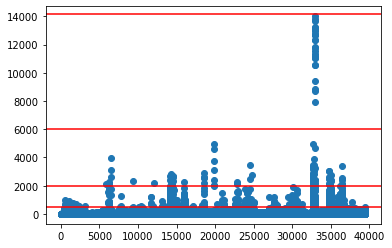

In [6]:
# Around entry ~32000 we see a massive group of outliers which range from around
# 7000 to as high as 14000 in terms of emoticon numbers observed

# The red lines separate the 4 key levels of outliers
# 500-2000
# 2000-6000
# 6000-14200

plt.scatter(range(len(non_ccc)), non_ccc['emoticonusage_num_emo'].values.tolist())
plt.axhline(y=14200, color='r', linestyle='-')
plt.axhline(y=6000, color='r', linestyle='-')
plt.axhline(y=2000, color='r', linestyle='-')
plt.axhline(y=500, color='r', linestyle='-')

### Below is a visualization of trends in the outliers from ~500 to ~2000

In [7]:
df_low = isolated_df(non_ccc, 500, 2000).dropna()
df_low

,emoticonusage_num_emo,emoticonusage_chunk_unique_users,emoticonusage_perc_emoji_of_stream,emoticonusage_emoji_user_ratio,uniqueusersengagement_hour_unique_users,uniqueusersengagement_chunk_unique_users,uniqueusersengagement_chunk_to_stream_unique_users,uniqueusersengagement_chunk_to_hour_unique_users,uniqueusersengagement_stream_unique_users,meanchatrateperuniqueusers_mean_chat_rate_per_minute,audiolevel_mean_volume,audiolevel_max_volume,activeusersengagement_num_chats_by_top_emoji_users,activeusersengagement_num_chats_by_top_words_users,activeusersengagement_num_chats_by_top_words_emoji_users,userengagement_num_words,userengagement_num_emo,userengagement_num_words_emo,ccc_overlap
514,679,367,0.004202,1.850136,4942,367,0.007141,0.074261,51392,4.832143,-53.6,-33.1,67,68,68,1217,679,1896,False
526,573,466,0.003546,1.229614,4942,466,0.009068,0.094294,51392,2.791469,-84.3,-74.7,40,40,40,1481,573,2054,False
571,958,210,0.005929,4.561905,5810,210,0.004086,0.036145,51392,2.024735,-85.5,-73.4,14,14,14,123,958,1081,False
627,584,369,0.003614,1.582656,5810,369,0.007180,0.063511,51392,6.593870,-51.9,-26.1,78,76,76,12075,584,12659,False
914,625,109,0.003868,5.733945,610,109,0.002121,0.178689,51392,2.689840,-20.6,-5.5,16,8,8,66,625,691,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37591,970,306,0.039031,3.169935,2408,306,0.037122,0.127076,8243,3.356347,-24.6,-6.9,7,4,7,256,970,1226,False
37592,626,227,0.025189,2.757709,2408,227,0.027539,0.094269,8243,4.021807,-28.2,-12.6,5,6,5,292,626,918,False
37689,702,385,0.028247,1.823377,2385,385,0.046706,0.161426,8243,2.034364,-29.1,-7.8,5,7,2,443,702,1145,False
38638,530,258,0.016022,2.054264,2386,258,0.021767,0.108131,11853,2.306452,-91.0,-91.0,10,6,7,964,530,1494,False


[emoticonusage_num_emo]: 0.9999999999999999
[emoticonusage_chunk_unique_users]: 0.14888329278334217
[emoticonusage_perc_emoji_of_stream]: 0.11174119085514995
[emoticonusage_emoji_user_ratio]: 0.27835883408404144
[uniqueusersengagement_hour_unique_users]: -0.011664325742004817
[uniqueusersengagement_chunk_unique_users]: 0.14888329278334217
[uniqueusersengagement_chunk_to_stream_unique_users]: 0.16976540695065365
[uniqueusersengagement_chunk_to_hour_unique_users]: 0.0799624733135504
[uniqueusersengagement_stream_unique_users]: -0.1519314940759985
[meanchatrateperuniqueusers_mean_chat_rate_per_minute]: 0.1568234059422176
[audiolevel_mean_volume]: -0.06376702095547342
[audiolevel_max_volume]: -0.06212634124221962
[activeusersengagement_num_chats_by_top_emoji_users]: 0.29638458857271727
[activeusersengagement_num_chats_by_top_words_users]: 0.24987767250431098
[activeusersengagement_num_chats_by_top_words_emoji_users]: 0.28473698309866957
[userengagement_num_words]: 0.18247845928426382
[user

/home/zachary/.local/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


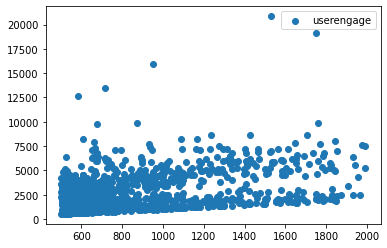

In [8]:
x = df_low['emoticonusage_num_emo'].values.tolist()
low_scores = list()
categories = list()
for cat in df_low:
    y = df_low[cat].values.tolist()
    if cat.find('num_emo') == -1 and pearsonr(x, y)[0] > 0.3:
        categories.append(cat[:10])
        plt.scatter(x, y, marker='o')
    print(f"[{cat}]: {pearsonr(x, y)[0]}")
    low_scores.append(np.mean(df_low[cat]))
    
plt.legend(categories)

### Below is a visualization of trends in the outliers from ~2000 to ~6000

In [9]:
df_med = isolated_df(non_ccc, 2000, 6000)
df_med

,emoticonusage_num_emo,emoticonusage_chunk_unique_users,emoticonusage_perc_emoji_of_stream,emoticonusage_emoji_user_ratio,uniqueusersengagement_hour_unique_users,uniqueusersengagement_chunk_unique_users,uniqueusersengagement_chunk_to_stream_unique_users,uniqueusersengagement_chunk_to_hour_unique_users,uniqueusersengagement_stream_unique_users,meanchatrateperuniqueusers_mean_chat_rate_per_minute,audiolevel_mean_volume,audiolevel_max_volume,activeusersengagement_num_chats_by_top_emoji_users,activeusersengagement_num_chats_by_top_words_users,activeusersengagement_num_chats_by_top_words_emoji_users,userengagement_num_words,userengagement_num_emo,userengagement_num_words_emo,ccc_overlap
5942,2088,178,0.258736,11.730337,697,178,0.081801,0.255380,2176,5.622426,-91.0,-91.0,40,29,29,589,2088,2677,False
6361,2268,355,0.034228,6.388732,6205,355,0.017995,0.057212,19728,2.103175,-91.0,-91.0,7,2,0,1923,2268,4191,False
6362,2111,414,0.031859,5.099034,6205,414,0.020985,0.066720,19728,2.274247,-91.0,-91.0,6,1,0,1752,2111,3863,False
6552,2616,327,0.039480,8.000000,5425,327,0.016575,0.060276,19728,3.320285,-91.0,-91.0,9,10,10,5261,2616,7877,False
6553,3968,336,0.059884,11.809524,5425,336,0.017032,0.061935,19728,4.603306,-91.0,-91.0,30,15,15,9275,3968,13243,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37335,2064,434,0.007884,4.755760,7767,434,0.011196,0.055877,38765,1.250513,-32.9,-20.3,0,3,3,6065,2064,8129,False
37336,2369,317,0.009049,7.473186,7767,317,0.008177,0.040814,38765,1.443299,-34.8,-19.8,1,1,3,6820,2369,9189,False
37344,2089,318,0.007979,6.569182,7767,318,0.008203,0.040942,38765,1.765306,-33.6,-24.4,0,1,1,6953,2089,9042,False
37345,3390,415,0.012949,8.168675,7767,415,0.010706,0.053431,38765,1.459725,-33.2,-20.2,0,2,2,11725,3390,15115,False


[emoticonusage_num_emo]: 1.0
[emoticonusage_chunk_unique_users]: -0.3264471850889169
[emoticonusage_perc_emoji_of_stream]: 0.0022067362523171584
[emoticonusage_emoji_user_ratio]: 0.500721951292775
[uniqueusersengagement_hour_unique_users]: -0.30339541539179565
[uniqueusersengagement_chunk_unique_users]: -0.3264471850889169
[uniqueusersengagement_chunk_to_stream_unique_users]: -0.07610767973295336
[uniqueusersengagement_chunk_to_hour_unique_users]: -0.07211517200537093
[uniqueusersengagement_stream_unique_users]: -0.2350417977569096
[meanchatrateperuniqueusers_mean_chat_rate_per_minute]: 0.43874796144273365
[audiolevel_mean_volume]: 0.19547970945731474
[audiolevel_max_volume]: 0.21261880783238496
[activeusersengagement_num_chats_by_top_emoji_users]: 0.5339755253342252
[activeusersengagement_num_chats_by_top_words_users]: 0.2388325456211126
[activeusersengagement_num_chats_by_top_words_emoji_users]: 0.44997596577455046
[userengagement_num_words]: 0.2013767792262682
[userengagement_num_em

/home/zachary/.local/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


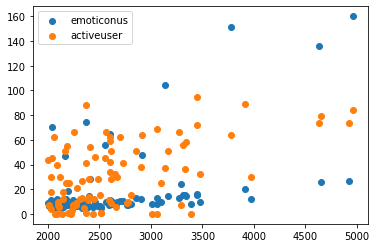

In [10]:
x = df_med['emoticonusage_num_emo'].values.tolist()
med_scores = list()
categories = list()
for cat in df_med:
    y = df_med[cat].values.tolist()
    if cat.find('num_emo') == -1 and pearsonr(x, y)[0] > 0.5:
        categories.append(cat[:10])
        plt.scatter(x, y, marker='o')
    print(f"[{cat}]: {pearsonr(x, y)[0]}")
    med_scores.append(np.mean(df_med[cat]))
    
plt.legend(categories)

### Below is a visualization of trends in the outliers from ~6000 to ~14000

In [11]:
df_high = isolated_df(non_ccc, 6000)
df_high

,emoticonusage_num_emo,emoticonusage_chunk_unique_users,emoticonusage_perc_emoji_of_stream,emoticonusage_emoji_user_ratio,uniqueusersengagement_hour_unique_users,uniqueusersengagement_chunk_unique_users,uniqueusersengagement_chunk_to_stream_unique_users,uniqueusersengagement_chunk_to_hour_unique_users,uniqueusersengagement_stream_unique_users,meanchatrateperuniqueusers_mean_chat_rate_per_minute,audiolevel_mean_volume,audiolevel_max_volume,activeusersengagement_num_chats_by_top_emoji_users,activeusersengagement_num_chats_by_top_words_users,activeusersengagement_num_chats_by_top_words_emoji_users,userengagement_num_words,userengagement_num_emo,userengagement_num_words_emo,ccc_overlap
33798,8733,81,0.013899,107.814815,1586,81,0.010070,0.051072,8044,15.906542,-27.9,-16.0,79,27,50,1047,8733,9780,False
33799,13786,114,0.021941,120.929825,1586,114,0.014172,0.071879,8044,17.774510,-24.7,-10.6,91,27,57,802,13786,14588,False
33800,14009,101,0.022295,138.702970,1586,101,0.012556,0.063682,8044,17.840580,-25.0,-10.6,85,24,52,1295,14009,15304,False
33801,13186,95,0.020986,138.800000,1586,95,0.011810,0.059899,8044,19.941581,-22.4,-9.4,131,27,95,975,13186,14161,False
33802,12345,98,0.019647,125.969388,1586,98,0.012183,0.061791,8044,17.522059,-21.4,-8.4,119,23,87,1541,12345,13886,False
33803,12704,111,0.020219,114.450450,1586,111,0.013799,0.069987,8044,18.422145,-20.1,-8.4,136,33,105,1335,12704,14039,False
33804,13260,95,0.021103,139.578947,1586,95,0.011810,0.059899,8044,19.415771,-19.6,-6.5,140,34,106,859,13260,14119,False
33805,12685,106,0.020188,119.669811,1586,106,0.013178,0.066835,8044,17.506329,-18.3,-6.7,121,36,100,1161,12685,13846,False
33806,13092,122,0.020836,107.311475,1586,122,0.015167,0.076923,8044,17.594684,-18.4,-6.1,108,36,76,852,13092,13944,False
33807,11172,144,0.017780,77.583333,1586,144,0.017902,0.090794,8044,15.073826,-18.9,-7.0,107,25,82,1565,11172,12737,False


[emoticonusage_num_emo]: 0.9999999999999998
[emoticonusage_chunk_unique_users]: -0.09383807975980227
[emoticonusage_perc_emoji_of_stream]: 0.9999999999999998
[emoticonusage_emoji_user_ratio]: 0.6220462240590439
[uniqueusersengagement_hour_unique_users]: nan
[uniqueusersengagement_chunk_unique_users]: -0.09383807975980227
[uniqueusersengagement_chunk_to_stream_unique_users]: -0.09383807685808576
[uniqueusersengagement_chunk_to_hour_unique_users]: -0.093838079430663
[uniqueusersengagement_stream_unique_users]: nan
[meanchatrateperuniqueusers_mean_chat_rate_per_minute]: 0.5440649900822709
[audiolevel_mean_volume]: 0.1118254260339494
[audiolevel_max_volume]: 0.1773523971505149
[activeusersengagement_num_chats_by_top_emoji_users]: 0.017153751753259283
[activeusersengagement_num_chats_by_top_words_users]: -0.11404757200193728
[activeusersengagement_num_chats_by_top_words_emoji_users]: -0.010611303437686792
[userengagement_num_words]: -0.11557338302391246
[userengagement_num_emo]: 0.999999999

/home/zachary/.local/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


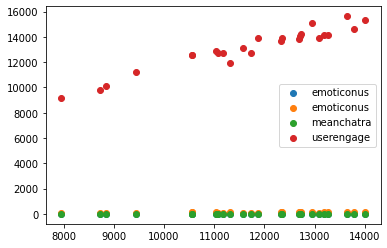

In [12]:
x = df_high['emoticonusage_num_emo'].values.tolist()
high_scores = list()
categories = list()
for cat in df_high:
    y = df_high[cat].values.tolist()
    if cat.find('num_emo') == -1 and pearsonr(x, y)[0] > 0.5:
        categories.append(cat[:10])
        plt.scatter(x, y, marker='o')
    print(f"[{cat}]: {pearsonr(x, y)[0]}")
    high_scores.append(np.mean(df_high[cat]))
    
plt.legend(categories)

### Below describes correlation between num_emo and audio levels

In [15]:
audio_df = pd.DataFrame(index=['audiolevel_mean correlation', 'audiolevel_max correlation', 'mean audio level'])
levels = [df_low, df_med, df_high]
for level in levels:
    name = [x for x in globals() if globals()[x] is level][0]
    x = preprocessing.normalize([np.array(level['emoticonusage_num_emo'])])
    y = preprocessing.normalize([np.array(level['audiolevel_mean_volume'])])
    mean_audio_cor = pearsonr(x[0], y[0])[0]
    y = preprocessing.normalize([np.array(level['audiolevel_max_volume'])])
    max_audio_cor = pearsonr(x[0], y[0])[0]
    mean_audio = np.mean(level['audiolevel_mean_volume'])
    audio_df[name] = [mean_audio_cor, max_audio_cor, mean_audio]
audio_df

,df_low,df_med,df_high
audiolevel_mean correlation,-0.063767,0.195480,0.111825
audiolevel_max correlation,-0.062126,0.212619,0.177352
mean audio level,-47.297474,-50.463043,-23.248000


## Conclusion

### Non-CCC as a whole
1. There are three main levels of outliers
    * 500 to 2000
    * 2000 to 6000
    * 6000 to 14000
2. Outliers near entry ~32000 are much more extreme

### Low end outliers (500 to 2000)
1. Minor correlation (0.350) described between num_emo and userengagement_num_words_emo
2. Other than the above described, no other significant correlations are present within the dataset
3. Note: Average chat_per_unique_user_per_minute was 0.157

### Medium outliers (2000 to 6000)
1. Minor correlation described between num_emo and emoji_user_ratio (0.501) and chats_by_top_emoji_users (0.534)
2. Highest correlation between num_emo and audio levels (0.195 & 0.213) occured in this level
3. Note: Average chat_per_unique_user_per_minute was 0.439 (+179.618% increase from low end)

### High end outliers (6000 to 14000)
1. Very strong correlation described between num_emo and userengagement_num_emo (0.999)
2. Second highest correlation between num_emo and audio levels (0.112 & 0.177) occured in this level
3. Note: Average chat per unique user per minute was 0.544 (+23.918% increase from med)

### Other considerations
1. There is a massive difference between the high end unique_user_num and the med/low end unique_user_num
   which may be a result of the small sample size of the high end data